# S08 T01: Tasca Feature Engineering

### Descripció

__Aprèn a gestionar paràmetres amb Python__
## Nivell 1
### - Exercici 1

__**Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.**__


In [71]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler


import seaborn as sns
%matplotlib inline

Reading the dataseet with heart disease data, Making overview about data

In [72]:
df_orig=pd.read_csv('heart.csv')
df=df_orig.copy()  
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


some documentation about columns
+ age: The person's age in years
+    sex: The person's sex (1 = male, 0 = female)
+    cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
+    trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
+    chol: The person's cholesterol measurement in mg/dl
+    fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
+    restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
+    thalach: The person's maximum heart rate achieved
+    exang: Exercise induced angina (1 = yes; 0 = no)
+    oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
+    slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
+    ca: The number of major vessels (0-3)
+    thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
+    target: Heart disease (0 = no, 1 = yes)

In [74]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [75]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Its a strange step. but we going to cheange the discrete variables to categorical, because is needed by the exercice1


In [76]:

df['sex'].replace(value=['female','male'],to_replace=[0,1],inplace=True)
df['cp'].replace(value=['low','medium','intensive','high'],to_replace=[0,1,2,3],inplace=True)
df['fbs'].replace(value=['true','false'],to_replace=[1,0],inplace=True)
df['exang'].replace(value=['yes','no'],to_replace=[1,0],inplace=True)
df['restecg'].replace(value=['normal','abnormality','hypertrophy'],to_replace=[0,1,2],inplace=True)
df['slope'].replace(value=['normal', 'fixed defect' , 'reversable defect'],to_replace=[0,1,2],inplace=True)
df['thal'].replace(value=['none','normal','fixed_defect','reverrsable_defect'],to_replace=[0,3,6,7],inplace=True)
df['target'].replace(value=['no disease','disease'],to_replace=[0,1],inplace=True)

df.describe(include="object")

,sex,cp,fbs,restecg,exang,slope,thal,target
count,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,4,2
top,male,low,false,abnormality,no,fixed defect,2,disease
freq,713,497,872,513,680,482,544,526


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 112.2+ KB


we going to split the columns in numerical and categorical

In [78]:
attributos_numericos = df.select_dtypes([np.number]).columns
attributos_numericos

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'], dtype='object')

In [79]:
attributos_categoricos = df.select_dtypes(np.object0).columns
attributos_categoricos

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target'], dtype='object')

we apply the dummies 

In [80]:
pd.get_dummies(df, dummy_na=False)

,age,trestbps,chol,thalach,oldpeak,ca,sex_female,sex_male,cp_high,cp_intensive,...,exang_yes,slope_fixed defect,slope_normal,slope_reversable defect,thal_1,thal_2,thal_none,thal_normal,target_disease,target_no disease
0,52,125,212,168,1.0,2,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,53,140,203,155,3.1,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,1
2,70,145,174,125,2.6,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,1
3,61,148,203,161,0.0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
4,62,138,294,106,1.9,3,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
1021,60,125,258,141,2.8,1,0,1,0,0,...,1,1,0,0,0,0,0,1,0,1
1022,47,110,275,118,1.0,1,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1
1023,50,110,254,159,0.0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0


Now we apply the normalization

In [81]:
scaler = StandardScaler()
df_standard_scale = pd.DataFrame(scaler.fit_transform(df[attributos_numericos]), columns=attributos_numericos)
df_new = pd.concat([df_standard_scale,pd.get_dummies(df, dummy_na=False)],axis=1)
df_new


,age,trestbps,chol,thalach,oldpeak,ca,age,trestbps,chol,thalach,...,exang_yes,slope_fixed defect,slope_normal,slope_reversable defect,thal_1,thal_2,thal_none,thal_normal,target_disease,target_no disease
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,1.209221,52,125,212,168,...,0,0,0,1,0,0,0,1,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,-0.731971,53,140,203,155,...,1,0,1,0,0,0,0,1,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,-0.731971,70,145,174,125,...,1,0,1,0,0,0,0,1,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0.238625,61,148,203,161,...,0,0,0,1,0,0,0,1,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,2.179817,62,138,294,106,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.479107,-0.484803,0.647366,-0.912329,-0.731971,59,140,221,164,...,1,0,0,1,0,1,0,0,1,0
1021,0.613800,-0.377636,0.232705,-0.352873,1.471705,0.238625,60,125,258,141,...,1,1,0,0,0,0,0,1,0,1
1022,-0.819834,-1.234378,0.562371,-1.353113,-0.060888,0.238625,47,110,275,118,...,1,1,0,0,0,1,0,0,0,1
1023,-0.488996,-1.234378,0.155137,0.429923,-0.912329,-0.731971,50,110,254,159,...,0,0,0,1,0,1,0,0,1,0


In [82]:
df_new.describe()

,age,trestbps,chol,thalach,oldpeak,ca,age,trestbps,chol,thalach,...,exang_yes,slope_fixed defect,slope_normal,slope_reversable defect,thal_1,thal_2,thal_none,thal_normal,target_disease,target_no disease
count,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1025.000000,1025.000000,1025.00000,1025.000000,...,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,-3.431402e-16,-7.036106e-16,-3.466062e-18,-4.332578e-16,-2.426243e-16,1.819683e-17,54.434146,131.611707,246.00000,149.114146,...,0.336585,0.470244,0.072195,0.457561,0.062439,0.530732,0.006829,0.400000,0.513171,0.486829
std,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,9.072290,17.516718,51.59251,23.005724,...,0.472772,0.499357,0.258937,0.498439,0.242069,0.499298,0.082397,0.490137,0.500070,0.500070
min,-2.804866e+00,-2.148237e+00,-2.327054e+00,-3.397080e+00,-9.123291e-01,-7.319715e-01,29.000000,94.000000,126.00000,71.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.095548e-01,-6.632165e-01,-6.787242e-01,-7.442713e-01,-9.123291e-01,-7.319715e-01,48.000000,120.000000,211.00000,132.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.726817e-01,-9.205458e-02,-1.163527e-01,1.255019e-01,-2.311765e-01,-7.319715e-01,56.000000,130.000000,240.00000,152.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,7.240794e-01,4.791073e-01,5.623715e-01,7.343432e-01,6.202642e-01,2.386246e-01,61.000000,140.000000,275.00000,166.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,2.488552e+00,3.906079e+00,6.166694e+00,2.299935e+00,4.366603e+00,3.150413e+00,77.000000,200.000000,564.00000,202.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



## Nivell 2

### - Exercici 2

**Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.**

In [83]:
df=df_orig.copy()  
df.mean(axis=0)

age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.513171
dtype: float64

In [84]:
df.var(axis=0)

age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64

In [85]:
df_standard_scale = scaler.fit_transform(df[attributos_numericos])
df_standard_scale


array([[-0.26843658, -0.37763552, -0.65933209,  0.82132052, -0.06088839,
         1.20922066],
       [-0.15815703,  0.4791073 , -0.83386117,  0.2559679 ,  1.72713707,
        -0.73197147],
       [ 1.71659547,  0.76468824, -1.39623266, -1.04869198,  1.30141672,
        -0.73197147],
       ...,
       [-0.81983438, -1.23437834,  0.56237149, -1.35311262, -0.06088839,
         0.23862459],
       [-0.4889957 , -1.23437834,  0.15513696,  0.42992256, -0.91232909,
        -0.73197147],
       [-0.04787747, -0.66321646, -1.12474297, -1.57055593,  0.27968789,
         0.23862459]])

First we need the covariance matix and their edige vectors

In [86]:
print('NumPy covariance matrix: \n%s' %np.cov(df_standard_scale.T))

NumPy covariance matrix: 
[[ 1.00097656  0.27138617  0.22003721 -0.39060816  0.20833994  0.27181572]
 [ 0.27138617  1.00097656  0.12810241 -0.03930241  0.18761715  0.10465582]
 [ 0.22003721  0.12810241  1.00097656 -0.02179335  0.06494367  0.07433186]
 [-0.39060816 -0.03930241 -0.02179335  1.00097656 -0.35013776 -0.20809143]
 [ 0.20833994  0.18761715  0.06494367 -0.35013776  1.00097656  0.22203265]
 [ 0.27181572  0.10465582  0.07433186 -0.20809143  0.22203265  1.00097656]]


In [87]:
cov_mat = np.cov(df_standard_scale.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52631134  0.61088338  0.14112297  0.55125914 -0.1459305  -0.06870106]
 [ 0.31933722 -0.3224036   0.49013637  0.12730085  0.73119237  0.05475593]
 [ 0.22828117 -0.17468807  0.67094958 -0.36411453 -0.54956441 -0.18054922]
 [-0.46682819  0.59486071  0.44102743 -0.23038293  0.18188416  0.38412087]
 [ 0.44195429  0.34612222 -0.2704826  -0.69174753  0.2789656  -0.23532643]
 [ 0.39453222 -0.13675394 -0.14836199 -0.12544932 -0.17645769  0.86991756]]

Eigenvalues 
[1.9862446  0.47165788 1.08389536 0.7582607  0.88707887 0.81872197]


In [88]:

# reorganicing in pairs the eigen values
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# sorting the values
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# showing the autovalues list
print('Autovalues in descense order :')
for i in eig_pairs:
    print(i[0])



Autovalues in descense order :
1.9862446032905268
1.0838953562867186
0.8870788697147793
0.818721967500067
0.7582607007414295
0.47165787746648097


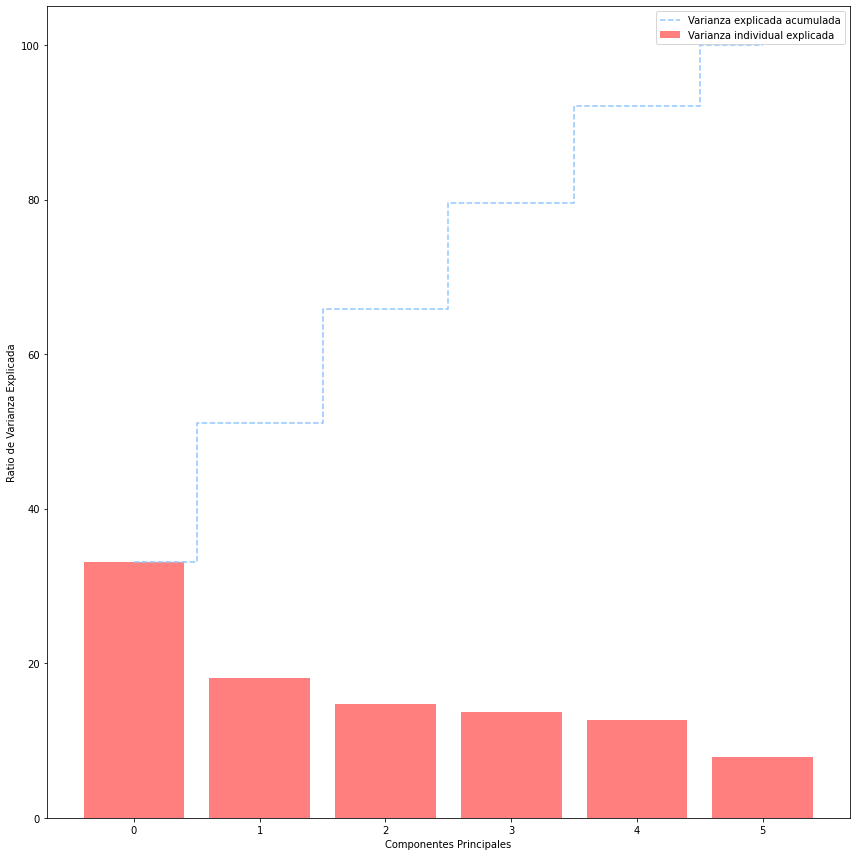

In [89]:
# geting the variance from the autovalues 
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

#shwoing a barplot 
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(12, 12))

    plt.bar(range(6), var_exp, alpha=0.5, align='center',label='Varianza individual explicada', color='r')
    plt.step(range(6), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()


the first five variables showing the 90% of the variation

In [90]:

pca = PCA(n_components=5)
new_df = pd.DataFrame(data = df_standard_scale, columns = attributos_numericos).set_index(df.index)
principalComponents = pca.fit_transform(new_df)
#principalDf = pd.DataFrame(data = principalComponents
 #            , columns = attributos_numericos[:4]).set_index(new_df.index)
#print("shape of X_pca", principalDf.shape)



## Nivell 3
### - Exercici 3

**Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.**

With the boxplot is easy to show the outliers

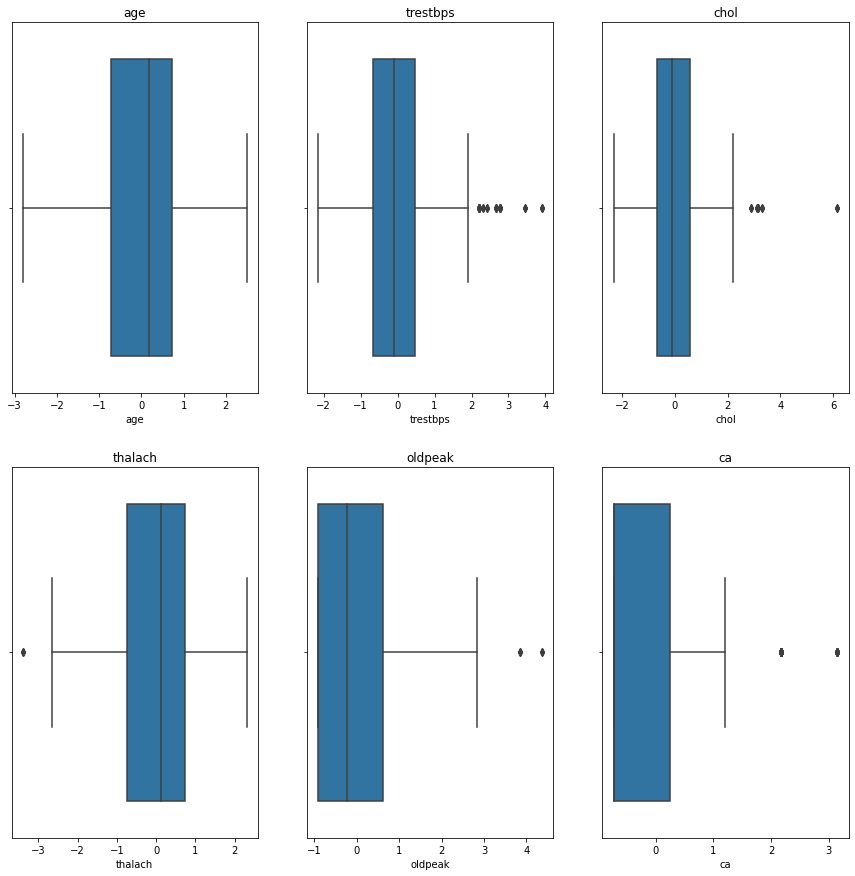

In [91]:


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
count=0
for column in new_df.columns.values: 
    sns.boxplot(x=new_df[column],ax=ax[int(count/3),int(count%3)])
    ax[int(count/3),int(count%3)].title.set_text(column)
    count=count+1



We get the data betwen the normal range and discart the outliers points

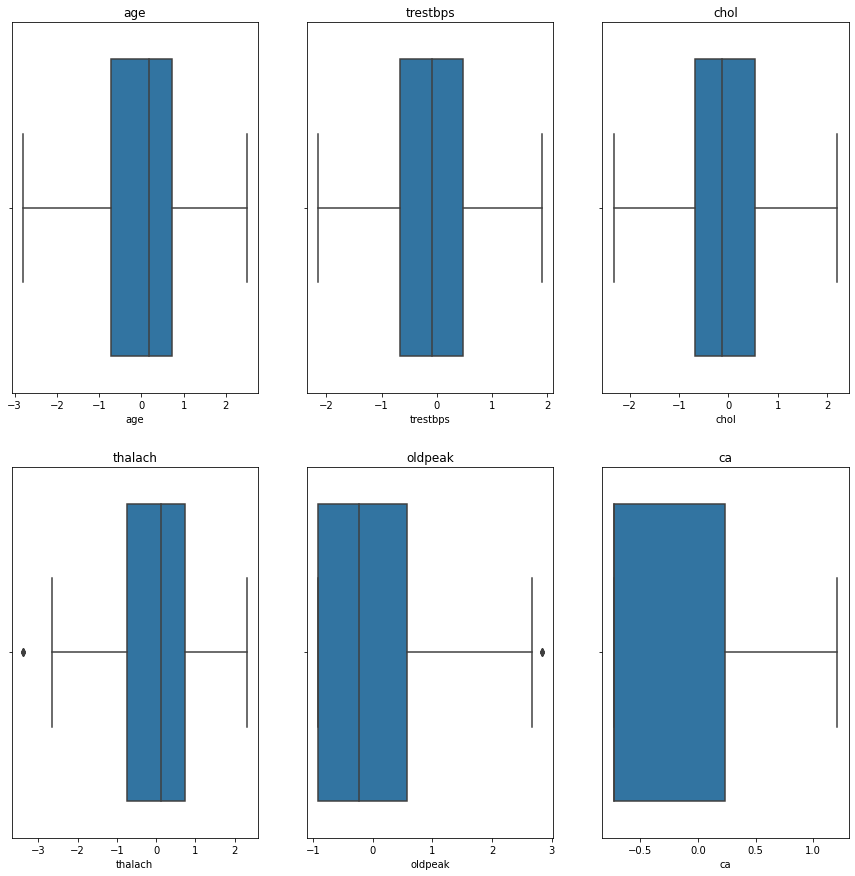

In [92]:


def ouliers_limits(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    q_range = q3 - q1
    upper_limit = q3 + 1.5 * q_range
    lower_limit = q1 - 1.5 * q_range
    return upper_limit, lower_limit



scaler = StandardScaler()
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
count=0
df_outliers=pd.DataFrame()
for column in new_df.columns.values:   
    upper, lower = ouliers_limits(new_df, column)
    df_outliers = new_df[(df[column] > lower) & (new_df[column] < upper)]
    sns.boxplot(x=df_outliers[column],ax=ax[int(count/3),int(count%3)])
    ax[int(count/3),int(count%3)].title.set_text(column)
    count=count+1



As the boxplot show the data is clean of ouliers

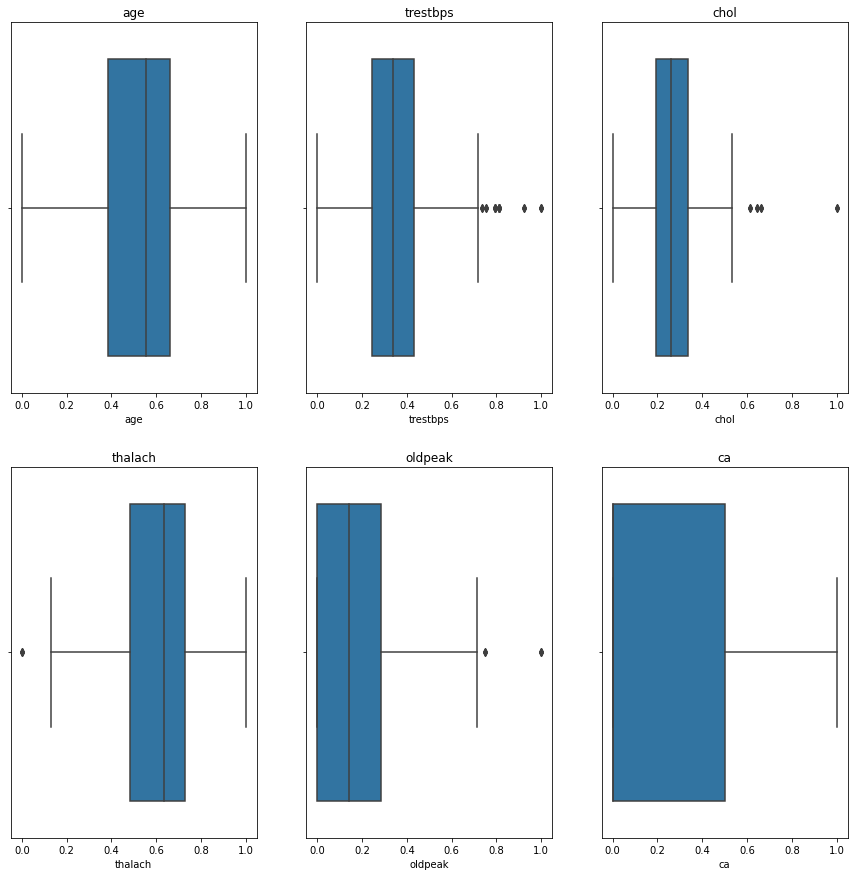

In [93]:
# Create the scaler
stand_scale = StandardScaler()
normal_scale = MinMaxScaler()

# Fit the scaler
stand_scale_fit = stand_scale.fit(df_outliers)
normal_scale_fit = normal_scale.fit(df_outliers)

# Apply the scaler 
np_outliers_scale = stand_scale_fit.transform(df_outliers)
np_outliers_norm = normal_scale_fit.transform(df_outliers)


# Convert data to DataFrame
df_outliers_scale = pd.DataFrame(df_outliers_scale, columns = attributos_numericos)
df_outliers_norm = pd.DataFrame(df_outliers_norm, columns = attributos_numericos)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
count=0
for column in df_outliers_norm.columns.values: 
    sns.boxplot(x=df_outliers_norm[column],ax=ax[int(count/3),int(count%3)])
    ax[int(count/3),int(count%3)].title.set_text(column)
    count=count+1



In [97]:
df_outliers_scale.head()

,age,trestbps,chol,thalach,oldpeak,ca
0,-0.245609,-0.349134,-0.659995,0.780918,-0.026372,2.014312
1,-0.133936,0.499720,-0.838786,0.216018,1.855775,-0.720022
2,1.764500,0.782671,-1.414891,-1.087596,1.407645,-0.720022
3,0.759446,0.952442,-0.838786,0.476741,-0.922632,0.647145
4,0.424428,-1.763891,0.055171,-1.217958,-0.026372,-0.720022


In [100]:
df_outliers_scale.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,9.380000e+02,9.380000e+02,9.380000e+02,9.380000e+02,9.380000e+02,9.380000e+02
mean,1.893771e-17,-1.893771e-17,-1.136262e-17,-1.515016e-17,-1.136262e-17,-3.787541e-17
std,1.000533e+00,1.000533e+00,1.000533e+00,1.000533e+00,1.000533e+00,1.000533e+00
min,-2.814081e+00,-2.103432e+00,-2.368445e+00,-3.434103e+00,-9.226325e-01,-7.200218e-01
25%,-8.039722e-01,-6.320855e-01,-6.798603e-01,-6.747851e-01,-9.226325e-01,-7.200218e-01
50%,8.940961e-02,-6.618285e-02,-1.136877e-01,1.725645e-01,-2.056240e-01,-7.200218e-01
75%,6.477732e-01,4.997198e-01,5.667126e-01,7.266008e-01,5.113845e-01,6.471451e-01
max,2.434537e+00,3.895135e+00,6.332733e+00,2.258348e+00,4.096427e+00,2.014312e+00


In [101]:
df_outliers_norm.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000
mean,0.536157,0.350656,0.272198,0.603273,0.183826,0.263326
std,0.190628,0.166795,0.114988,0.175765,0.199347,0.365915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.382979,0.245283,0.194064,0.484733,0.000000,0.000000
50%,0.553191,0.339623,0.259132,0.633588,0.142857,0.000000
75%,0.659574,0.433962,0.337329,0.730916,0.285714,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## REFERENCES
* [Dataset Heart disease ](https://www.kaggle.com/johnsmith88/heart-disease-dataset)  (__kaggel.com__)
* [Cercar la correlació entre múltiples variables (conjunt de dades multidimensional)  ](https://medium.com/@sebastiannorena/finding-correlation-between-many-variables-multidimensional-dataset-with-python-5deb3f39ffb3)  (__medium.com__)
* [Numpy, Scipy and pandas: correlation](https://realpython.com/numpy-scipy-pandas-correlation-python/) (__realpython.com__)
* [Covariance and correlation ](https://stackabuse.com/covariance-and-correlation-in-python/) ( __sackabuse.com__)
* [Feature Scaling: Com escalar i normalitzar les dades d’aprenentatge automàtic ](https://machinelearningmastery.com/scale-machine-learning-data-scratch-python/) (__machinelearnigmastery.com__)
* [Feature Scaling: Scaling of Data ](https://medium.com/@stallonejacob/data-science-scaling-of-data-in-python-ec7ad220b339) (__medium.com__)